<a href="https://colab.research.google.com/github/jxlyn/CSCI-4962-Projects-ML-AI/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 (60 points):
Part 1 (30 points): Implement your RNN either using an existing framework OR you can
implement your own RNN cell structure. In either case, describe the structure of your
RNN and the activation functions you are using for each time step and in the output
layer. Define a metric you will use to measure the performance of your model (NOTE:
Performance should be measured both for the validation set and the test set).**

The problem that I want to solve using RNN is predicting the AAPL(apple) stock based on the historical data. AAPL is a popular stock in today's society, so predicting it will be helpful for investors. The dataset that I chose is time-series dataset which means it has sequential dependency. It's suitable for RNN model.

Data set: https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231?resource=download&select=AAPL_2006-01-01_to_2018-01-01.csv


In [2]:
import pandas as pd
import tensorflow as tf
from pandas import Series, DataFrame
from google.colab import drive
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN, GRU
import warnings
warnings.filterwarnings("ignore")

drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv('drive/My Drive/ML and AI/Hw4/AAPL_stock.csv')
data2 = data.copy()
data3 = data.copy()
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [18]:
data.tail()

,Date,Open,High,Low,Close,Volume,Name
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL
3018,2017-12-29,170.52,170.59,169.22,169.23,25999922,AAPL


In [5]:
data.isna()

,Date,Open,High,Low,Close,Volume,Name
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3014,False,False,False,False,False,False,False
3015,False,False,False,False,False,False,False
3016,False,False,False,False,False,False,False
3017,False,False,False,False,False,False,False


In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [8]:
data.nunique()

Date      3019
Open      2630
High      2579
Low       2575
Close     2579
Volume    3019
Name         1
dtype: int64

In [10]:
fig = px.line(data,  y="Close", title='Stock price chart')
fig.show()

In [8]:
#divide the dataset to training and testing set and normalize the data
data_train = data2[data2['Date'] < '2017-01-01'] #training data is before 2017 (5/6 of entire dataset)
data_test = data2[data2['Date'] >= '2017-01-01'] #testing data ( 1/6 of the entire dataset)

new_train_data = data_train.drop(['Date','Name'],axis=1)
#print(new_train_data)

scale = MinMaxScaler()
new_train_data = scale.fit_transform(new_train_data)
x_train = []
y_train = []

#divide data to every 60 days

for i in range(60,new_train_data.shape[0]):
  x_train.append(new_train_data[i-60:i])
  y_train.append(new_train_data[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)

past_60_days = data_train.tail(60)
new_test_data = past_60_days.append(data_test,ignore_index= True)
new_test_data = new_test_data.drop(['Date','Name'],axis=1)
new_test_data2 = scale.fit_transform(new_test_data)
x_test = []
y_test = []

#divide data to every 30 days
for i in range(60,new_test_data2.shape[0]):
  x_test.append(new_test_data2[i-60:i])
  y_test.append(new_test_data2[i,0])

x_test=np.array(x_test)
y_test=np.array(y_test)

### for LSTM and GRU
x_test1 = x_test.copy()
y_test1 = y_test.copy()
#------------
x_test3 = x_test.copy()
y_test3 = y_test.copy()
#-------------
x_train1 = x_train.copy()
y_train1 = y_train.copy()
#-------------------
x_train2 = x_train.copy()
y_train2 = y_train.copy()

#scale
scale2 = scale.scale_
scale2 = 1/scale2[0]


In [13]:
# implement simple RNN
RNN_model = tf.keras.Sequential()
RNN_model.add(SimpleRNN(50, return_sequences=True, input_shape=(x_train.shape[1],5)))
RNN_model.add(Dropout(0.2))
RNN_model.add(SimpleRNN(100, return_sequences=False))
RNN_model.add(Dropout(0.2))
RNN_model.add(Dense(1, activation = "relu"))
RNN_model.compile(loss='mean_squared_error',optimizer='adam')
model_fit =  RNN_model.fit(x_train, y_train, epochs=10,batch_size=55,validation_data=(x_test, y_test))


Epoch 1/10
50/50 [==============================] - 4s 46ms/step - loss: 0.1164 - val_loss: 0.0202
Epoch 2/10
50/50 [==============================] - 2s 39ms/step - loss: 0.0564 - val_loss: 0.0123
Epoch 3/10
50/50 [==============================] - 3s 53ms/step - loss: 0.0294 - val_loss: 0.0085
Epoch 4/10
50/50 [==============================] - 2s 47ms/step - loss: 0.0198 - val_loss: 0.0025
Epoch 5/10
50/50 [==============================] - 2s 39ms/step - loss: 0.0129 - val_loss: 0.0069
Epoch 6/10
50/50 [==============================] - 2s 38ms/step - loss: 0.0103 - val_loss: 0.0018
Epoch 7/10
50/50 [==============================] - 2s 39ms/step - loss: 0.0084 - val_loss: 0.0016
Epoch 8/10
50/50 [==============================] - 2s 39ms/step - loss: 0.0066 - val_loss: 0.0015
Epoch 9/10
50/50 [==============================] - 2s 40ms/step - loss: 0.0061 - val_loss: 0.0011
Epoch 10/10
50/50 [==============================] - 2s 38ms/step - loss: 0.0050 - val_loss: 0.0012


I used tensorflow to implement my RNN. There are 2 RNN layers, 2 dropout layers, and 1 dense layer for my model. On the first layer, I created the weights based on the x_train data's shape. Then, I added dropout layer to avoid the problem of overfitting. After that, I added another RNN layer and dropout layer. Lastly, I added the dense layer with relu activcation because the variables can interact with each other in this activation. The loss function that I used is mean squared error because my model is regressor,  mean squared error can clearly show how close a regression line is to a set of data points. It's suitable for regression. I used Adam as my optimizer because it's more efficient than other optimizer in my data. It's like the combination of momentum and RMSP method. It uses the squared gradients to scale the learning rate and uses moving average of the gradient. Thus, It's good with sparse data, most consistent convergence, and it has faster computation time.

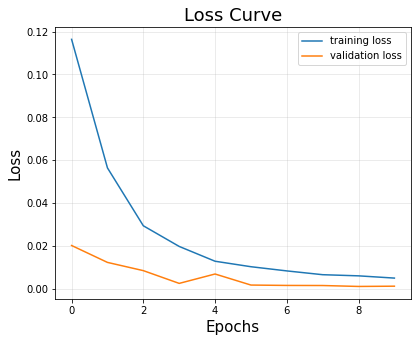

In [14]:
#create the loss graph
graph = plt.figure(figsize=(14,5))
graph.add_subplot(121)

plt.plot(model_fit.epoch,model_fit.history['loss'],label="training loss") # Loss curve for training set
plt.plot(model_fit.epoch,model_fit.history['val_loss'],label="validation loss")

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

8/8 [==============================] - 0s 10ms/step
Mean error between predicted and actual stock price is  1.801883629574719


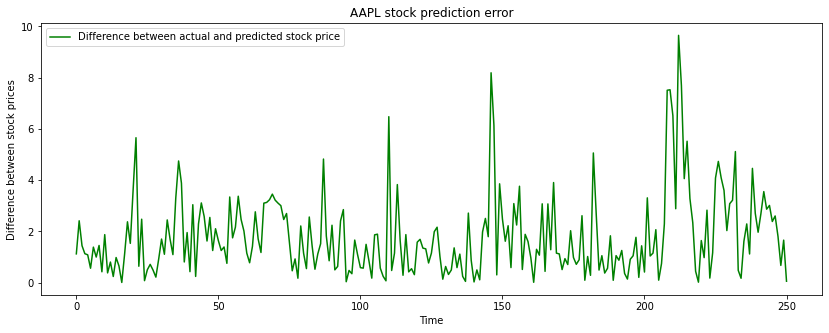

In [15]:
def metric(y_test,scale2, model, x_test):
  y_pred= model.predict(x_test)
  y_pred = y_pred* scale2
  y_pred_list = []
  error =[]
  y_test = y_test* scale2

  for i in y_pred:
    for j in i:
      y_pred_list.append(j)
 
  y_test_list = y_test.tolist()
  for i in range(len(y_pred_list)):
    error.append(abs(y_test_list[i]-y_pred_list[i]))
  print("Mean error between predicted and actual stock price is ", mean(error))
  return y_test,y_pred,error

y_test2, y_pred2,error = metric(y_test,scale2, RNN_model, x_test)
plt.figure(figsize=(14,5))
plt.plot(error, color='green', label='Difference between actual and predicted stock price')
plt.title('AAPL stock prediction error')
plt.xlabel('Time')
plt.ylabel('Difference between stock prices')
plt.legend()
plt.show()


The metric that I used to measure the performance of my model is the difference between the actual stock price from the validation data set and predicted stock price from the test set from the because in stock market, the difference between the predicted price and the actual price is very important, if the difference is a lot, it indicates that the model is not accurate. If the difference is very small, that means that it's accurate.

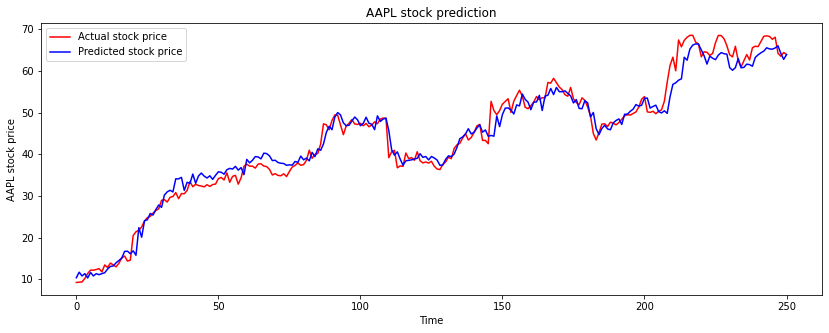

In [16]:
plt.figure(figsize=(14,5))
plt.plot(y_test2, color='red', label='Actual stock price')
plt.plot(y_pred2, color='blue', label='Predicted stock price')
plt.title('AAPL stock prediction')
plt.xlabel('Time')
plt.ylabel('AAPL stock price')
plt.legend()
plt.show()

**Part 2 (35 points): Update your network from part 1 with first an LSTM and then a GRU
based cell structure (You can treat both as 2 separate implementations). Re-do the
training and performance evaluation. What are the major differences you notice? Why
do you think those differences exist between the 3 implementations (basic RNN, LSTM
and GRU)?**

In [17]:
# Implementing LSTM
LSTM_model = tf.keras.Sequential()
LSTM_model.add(LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1],5)))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(100, return_sequences=False))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1, activation = "relu"))
LSTM_model.compile(loss='mean_squared_error',optimizer='adam')
model_fit2 =  LSTM_model.fit(x_train1, y_train1, epochs=10,batch_size=55,validation_data=(x_test1, y_test1))

Epoch 1/10
50/50 [==============================] - 10s 131ms/step - loss: 0.0193 - val_loss: 0.0059
Epoch 2/10
50/50 [==============================] - 6s 114ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 3/10
50/50 [==============================] - 6s 115ms/step - loss: 0.0018 - val_loss: 0.0045
Epoch 4/10
50/50 [==============================] - 6s 113ms/step - loss: 0.0017 - val_loss: 0.0035
Epoch 5/10
50/50 [==============================] - 6s 112ms/step - loss: 0.0017 - val_loss: 0.0050
Epoch 6/10
50/50 [==============================] - 6s 112ms/step - loss: 0.0015 - val_loss: 0.0056
Epoch 7/10
50/50 [==============================] - 6s 113ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 8/10
50/50 [==============================] - 6s 111ms/step - loss: 0.0016 - val_loss: 0.0036
Epoch 9/10
50/50 [==============================] - 6s 113ms/step - loss: 0.0013 - val_loss: 0.0052
Epoch 10/10
50/50 [==============================] - 6s 114ms/step - loss: 0.0015 - val_loss: 0.003

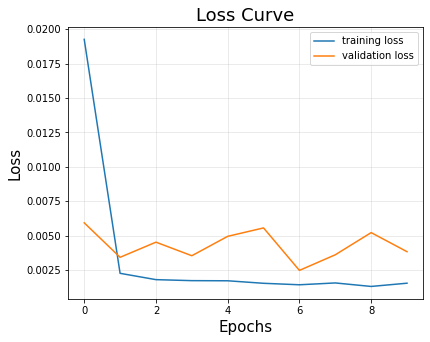

In [18]:
#create the loss graph
graph2 = plt.figure(figsize=(14,5))
graph2.add_subplot(121)

plt.plot(model_fit2.epoch,model_fit2.history['loss'],label="training loss") # Loss curve for training set
plt.plot(model_fit2.epoch,model_fit2.history['val_loss'],label="validation loss")

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

8/8 [==============================] - 1s 21ms/step
Mean error between predicted and actual stock price is  3.2185052724283514


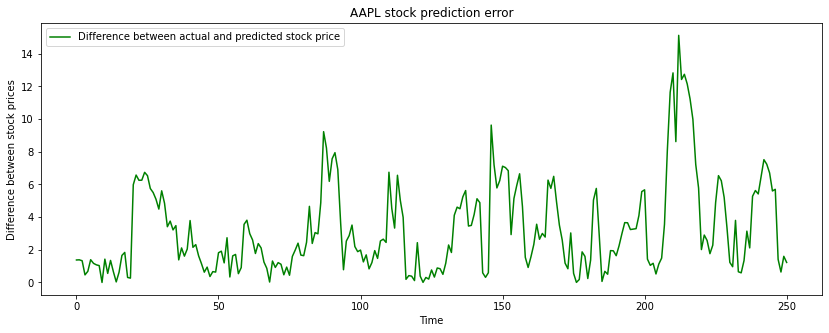

In [19]:
y_test4, y_pred3,error = metric(y_test1,scale2, LSTM_model, x_test1)
plt.figure(figsize=(14,5))
plt.plot(error, color='green', label='Difference between actual and predicted stock price')
plt.title('AAPL stock prediction error')
plt.xlabel('Time')
plt.ylabel('Difference between stock prices')
plt.legend()
plt.show()

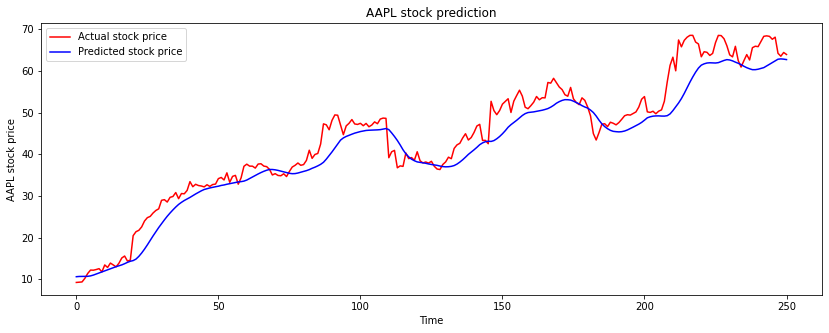

In [20]:
plt.figure(figsize=(14,5))
plt.plot(y_test4, color='red', label='Actual stock price')
plt.plot(y_pred3, color='blue', label='Predicted stock price')
plt.title('AAPL stock prediction')
plt.xlabel('Time')
plt.ylabel('AAPL stock price')
plt.legend()
plt.show()

In [22]:
#Implementing GRU
GRU_model = tf.keras.Sequential()
GRU_model.add(GRU(50, return_sequences=True, input_shape=(x_train2.shape[1],5)))
GRU_model.add(Dropout(0.2))
GRU_model.add(GRU(100, return_sequences=False))
GRU_model.add(Dropout(0.2))
GRU_model.add(Dense(1, activation = "relu"))
GRU_model.compile(loss='mean_squared_error',optimizer='adam')
model_fit3 =  LSTM_model.fit(x_train2, y_train2, epochs=10,batch_size=55,validation_data=(x_test3, y_test3))

Epoch 1/10
50/50 [==============================] - 7s 137ms/step - loss: 0.0013 - val_loss: 0.0039
Epoch 2/10
50/50 [==============================] - 6s 113ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 3/10
50/50 [==============================] - 6s 114ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 4/10
50/50 [==============================] - 6s 114ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 5/10
50/50 [==============================] - 6s 115ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 6/10
50/50 [==============================] - 6s 115ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 7/10
50/50 [==============================] - 6s 117ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 8/10
50/50 [==============================] - 6s 114ms/step - loss: 0.0010 - val_loss: 0.0038
Epoch 9/10
50/50 [==============================] - 6s 115ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 10/10
50/50 [==============================] - 6s 116ms/step - loss: 0.0011 - val_loss: 0.0059

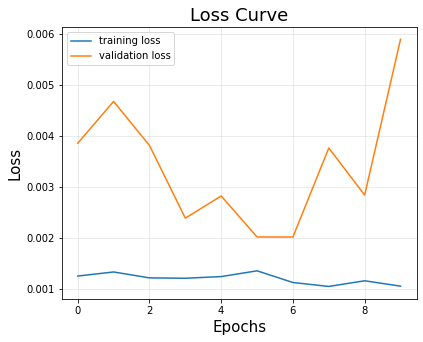

In [23]:
#create the loss graph
graph3 = plt.figure(figsize=(14,5))
graph3.add_subplot(121)

plt.plot(model_fit3.epoch,model_fit3.history['loss'],label="training loss") # Loss curve for training set
plt.plot(model_fit3.epoch,model_fit3.history['val_loss'],label="validation loss")

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

8/8 [==============================] - 0s 23ms/step
Mean error between predicted and actual stock price is  4.419983654402166


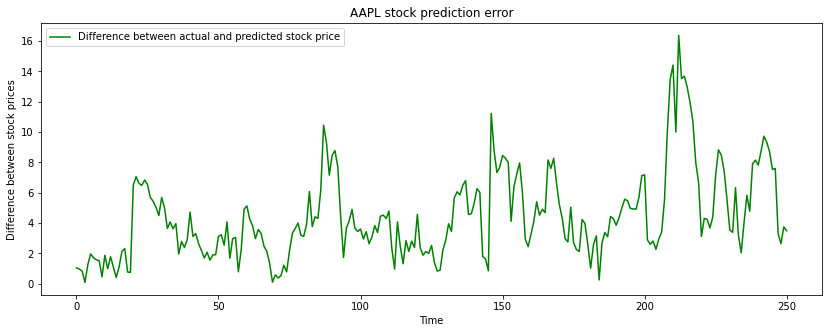

In [24]:
y_test5, y_pred4,error = metric(y_test3,scale2, LSTM_model, x_test1)
plt.figure(figsize=(14,5))
plt.plot(error, color='green', label='Difference between actual and predicted stock price')
plt.title('AAPL stock prediction error')
plt.xlabel('Time')
plt.ylabel('Difference between stock prices')
plt.legend()
plt.show()

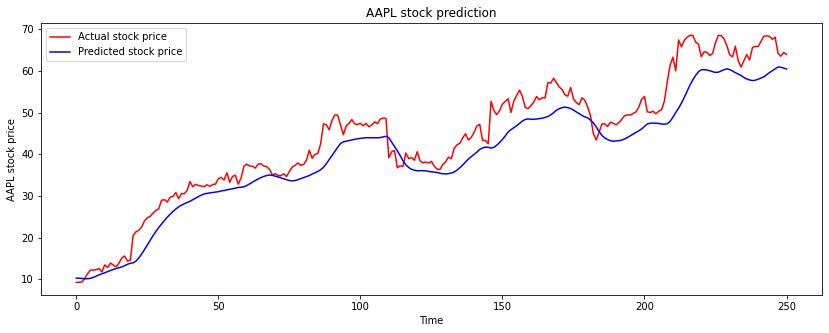

In [25]:
plt.figure(figsize=(14,5))
plt.plot(y_test5, color='red', label='Actual stock price')
plt.plot(y_pred4, color='blue', label='Predicted stock price')
plt.title('AAPL stock prediction')
plt.xlabel('Time')
plt.ylabel('AAPL stock price')
plt.legend()
plt.show()

As we can see from the data analysis graphs, the main difference between basic RNN, LSTM and GRU are their training loss, validation loss, and the max difference between actual stock price and predicted stock price. \\
In basic RNN model, the validation loss is low and didn't change much throughout epoches, the training loss is decreasing gradually forming a smooth curve. The max difference between predicted and actual stock price is 10. The shape of predicted stock price curve is very similar to the actual stock price curve,and the values are very closed. \\
For LSTM model, the validation loss is low and it changed in epoches, the training loss is decreasing significantly at the first epoch, then it remained low and didn't change much throughout the rest of epoches. The max difference between predicted and actual stock price is 14 which is higher than RNN model which means it's not accurate as basic RNN model. The shape of predicted stock price curve is smoother than actual stock price curve,and the values are not  closed as basic RNN model. \\
For GRU model, the validation loss inceased over the time, the training loss remained low, didn't changed much oveer the time. The max difference between predicted and actual stock price is 16. It's higher than basic RNN and LSTM model which means it's not accurate as RNN and LSTM.  The shape of predicted stock price curve is smoother than actual stock price curve, and the values are not closed as basic RNN model and LSTM model. \\
I think these differences existed in these 3 models because they have different structure. For example, LSTM stores memory on its cells, but RNN doesn't. LSTM takes the previous output and storing in its memory for a short period of time, thus it can't store the information for long time, when we need to predict the current output based on the information from long time ago, LSTM will not produce accurate result as RNN did. This is shown in our data result. For GRU, GRU has less gates than LSTM which means it uses less memory and faster than LSTM. However, because it has no memory unit, it just exposes the full hidden content without any control, thus it has low convergence rate and low learning efficiency. Thus, it has lowest accuracy among 3 models.


**Part 3 (10 points): Can you use the traditional feed-forward network to solve the same
problem. Why or why not? (Hint: Can time series data be converted to usual features
that can be used as input to a feed-forward network?)**

Yes, we can use the traditional feed-forward network to solve the same problem because the time series data can be converted to usual features that can be used as input to a feed-forward network. The difference between traditional feed-forward network and RNN is that traditional feed-forward network signals to travel one way only: from input to output. There are no feedback. On the other hand, the RNN signals traveling in both directions by introducing loops in the network. We can generate the stock price prediction RNN model to traditional feed-forward network model by changing input to sequence length * the number of features.  

**Task 2 (25 points):
In this task, use any of the pre-trained word embeddings. The Wor2vec embedding link
provided with the lecture notes can be useful to get started. Write your own code/function that 
uses these embeddings and outputs cosine similarity and a dissimilarity score for any 2 pair of
words (read as user input). The dissimilarity score should be defined by you. You either can
have your own idea of a dissimilarity score or refer to literature (cite the paper you used). In
either case clearly describe how this score helps determine the dissimilarity between 2 words.**

In [29]:
import tensorflow_hub as hub
#import the pre=trained word embeddings
model = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")

In [43]:
def cos_simi(word1,word2):
  # x . y / ||x|| * ||y||
  x = model([word1])[0].numpy()
  y = model([word2])[0].numpy()
  similarity = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)) 
  print("Cosine similarity between {} and {} is {}".format(word1,word2,similarity))
  return similarity

def cos_disimi(word1,word2):
  x = model([word1])[0].numpy()
  y = model([word2])[0].numpy()
  dissimilarity = 1-(np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)) )
  print("Cosine dissimilarity between {} and {} is {}".format(word1,word2,dissimilarity))
  return dissimilarity 

print("test cases:")
cos_simi("machine","learning")
cos_disimi("machine","learning")
print("---------------")
cos_simi("hello","world")
cos_disimi("hello","world")
print("---------------")
cos_simi("coconut","peanut")
cos_disimi("coconut","peanut")
print("---------------")
cos_simi("hi","hi")
cos_disimi("hi","hi")
print("---------------")

test cases:
Cosine similarity between machine and learning is 0.2201143205165863
Cosine dissimilarity between machine and learning is 0.7798856794834137
---------------
Cosine similarity between hello and world is 0.08436837047338486
Cosine dissimilarity between hello and world is 0.9156316295266151
---------------
Cosine similarity between coconut and peanut is 0.752373993396759
Cosine dissimilarity between coconut and peanut is 0.24762600660324097
---------------
Cosine similarity between hi and hi is 1.0
Cosine dissimilarity between hi and hi is 0.0
---------------


As we can see from the results, my implementation of dissimilarity looks correct because when testing the 2 same strings, the dissmilarity is 0. I came up with this formula because the cosine similarity between two vectors(after we converted the word to numpy) is measured in ‘θ’. If θ = 0°(cos 0=1), the ‘x’ and ‘y’ vectors overlap, thus shows that they are similar. If θ = 90°(cos 90 =0), the ‘x’ and ‘y’ vectors are dissimilar. From this, we can conclude that there's inverse relationship between cosine similarity and cos dissimilarity. Thus, dissimilarity = 1-similarity is true.